# UIContext example

This example demonstrates how to create and use a `UIContext` for offline data processing using LiberTEM.

To begin we import the `UIContext` class:

In [1]:
from libertem_ui.api import UIContext

In a Jupyter Notebook, the cell width is frequently limited to ~60% of the browser window width.

For GUI use it is better to occupy most of the browser window, and the `UIContext` has a helper method to enable this:

In [2]:
UIContext.notebook_fullwidth()

## Create LiberTEM resources and data

To work with a `UIContext` we need to provide it with a LiberTEM `Context` object and a `DataSet` object which describes how LiberTEM will carry out computations.

Here we will create a simple serial `Context` and an artificial dataset `DataSet` backed by a *numpy* array. Though all normal Context and DataSet types provided by LiberTEM are supported for GUI use:

In [3]:
import libertem.api as lt

In [4]:
ctx = lt.Context.make_with('inline')

This dataset is a single circle in a square frame, displaced at each scan coordinate, with a scan-to-detector rotation of 45 degrees:

In [5]:
import numpy as np
from skimage.draw import disk
ny, nx = (20, 50)
sig_shape = (64, 64)
data = np.random.uniform(high=0.1, size=(ny, nx) + sig_shape).astype(np.float32)
max_shift = 16
radius = 8
rotation = 45
cy, cx = np.asarray(sig_shape) / 2.
xshifts = np.linspace(-max_shift, max_shift, num=nx, endpoint=True)
yshifts = np.linspace(-max_shift, max_shift, num=ny, endpoint=True)
for xidx, xshift in enumerate(xshifts):
    for yidx, yshift in enumerate(yshifts):
        vec = xshift + yshift * 1j
        angle = np.angle(vec) + np.deg2rad(rotation)
        rr, cc = disk((cy + np.abs(vec)* np.sin(angle), cx + np.abs(vec)* np.cos(angle)), radius, shape=sig_shape)
        data[yidx, xidx, rr, cc] = 1.0

In [6]:
ds = ctx.load('memory', data=data, num_partitions=2)

## Create the application

We create the `UIContext` using the LT resources, and at the same time preload windows to run Virtual Detector and Centre-of-Mass analyses:

In [7]:
ui_context = UIContext.for_offline(ctx, ds).add('virtual_detector').add('com')

It is not required to pre-load windows at this stage, as the `UIContext` allows us to add and remove windows dynamically. It is possible to have multiple copies of the same window with different parametrisations, when the `UIContext` is run, all windows capable of running are run in parallel and display their results independently.

To show the `UIContext` we use the `.layout()` method: 

Column(min_width=700)
    [0] Row(margin=(0, 0))
        [0] SVG(str, align='center', height=50, margin=(2, 2))
        [1] HTML(str)
        [2] HTML(str, align='center', margin=(5, 5), styles={'border-left': '2px solid...})
        [3] Button(align='center', button_type='success', min_width=125, name='Run all', width=85, width_policy='min')
        [4] Button(align='center', button_type='danger', disabled=True, min_width=125, name='STOP', tags=['lt_enable_on_run'], width=85, width_policy='min')
        [5] StaticText(align='center', margin=(5, 2, 5, 5), value='<b>Global ROI:</b>', width=80)
        [6] Switch(align='center', margin=(5, 5, 8, 2), width=35)
    [1] Tqdm(align=('start', 'center'), layout=Column, margin=(5, 5, 0, 5), progress=Progress, text_pane=Str, width=650)
    [2] Card(button_css_classes=['cardtree-button'], collapsed=True, css_classes=['cardtree'], header='Logs', header_css_classes=['cardtree-header'], margin=(5, 5), stylesheets=['.cardtree {\n  ...])
        [0] Terminal(id=139699385534832)
    [3] Column(margin=(0, 0))
        [0] Column(width_policy='max')
            [0] Divider()
            [1] Row
                [0] Button(align='center', button_type='light', height=35, margin=(3, 3), name='▼', sizing_mode='fixed', width=35)
                [1] Bokeh(Div)
                [2] Markdown(str, align='center', margin=(3, 3))
                [3] StaticText(align='center', margin=(3, 3), value='[<b>e6a229</b>]')
                [4] Checkbox(align='center', min_width=50, name='Active', value=True)
                [5] Button(align='center', button_type='danger', name='Remove', tags=['lt_disable_on_run'], width_policy='min')
                [6] Button(align='center', button_type='success', min_width=75, name='Run this', tags=['lt_disable_on_run'], width_policy='min')
                [7] HTML(str, align='center', margin=(5, 5), styles={'border-left': '2px solid...})
                [8] Toggle(align='center', margin=(5, 5, 5, 5), name='Display')
                [9] Row(margin=(0, 0), visible=False)
                    [0] RadioButtonGroup(align='center', min_width=75, options=['Sig'], value='Sig')
                    [1] Row(align='center')
                        [0] Select(align='center', margin=(5, 2, 5, 2), max_width=300, width=200, width_policy='min')
                        [1] Select(align='center', margin=(5, 2, 5, 2), max_width=300, width=150, width_policy='min')
                        [2] Button(align='center', button_type='primary', name='Load')
                        [3] Checkbox(align='center', name='Auto-refresh', value=True)
            [2] Row
                [0] Column
                    [0] Column(margin=(0, 0))
                        [0] Row(height=40, margin=(0, 0))
                            [0] Button(name='Clear ROI', width=100)
                            [1] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['2f5f552b-18ee-44c4-b51e-...], visible=False, width=2)
                            [2] FloatPanel(config={'headerControls': {'maxim...}, margin=20, name='Image Controls', objects=[Bokeh(Button), ...], visible=False)
                        [1] Bokeh(figure)
                    [1] Column
                        [0] RadioButtonGroup(name='Imaging mode', options=['Point', 'Disk', ...], value='Disk', width=350)
                [1] Column
                    [0] Column(margin=(0, 0))
                        [0] Row(height=40, margin=(0, 0))
                            [0] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['619d3b63-aea5-420c-b266-...], visible=False, width=2)
                            [1] FloatPanel(config={'headerControls': {'maxim...}, margin=20, name='Image Controls', objects=[Bokeh(Button), ...], visible=False)
                        [1] Bokeh(figure)
                    [1] FloatSlider(end=32.0, name='Disk radius', start=0.3, value=16.0, width=350)
                    [2] RangeSlider(
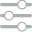
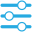
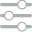
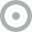
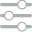
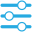
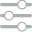
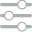
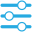
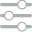
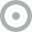
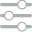
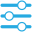
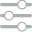

In [8]:
ui_context.layout()

There are a number of features which are worth mentioning.

At the top of the application are the global controls:

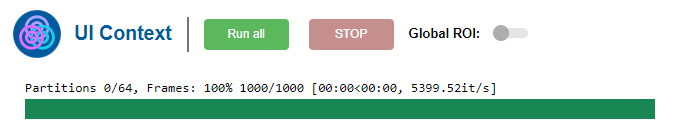

These allow running and stopping analyses from all windows on the `UIContext`, as well as displaying the progress.

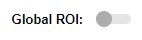

toggles a unique window which does not run any analyses, but provides tools to define a global Region-Of-Interest which will be used to limit all other windows which support it:

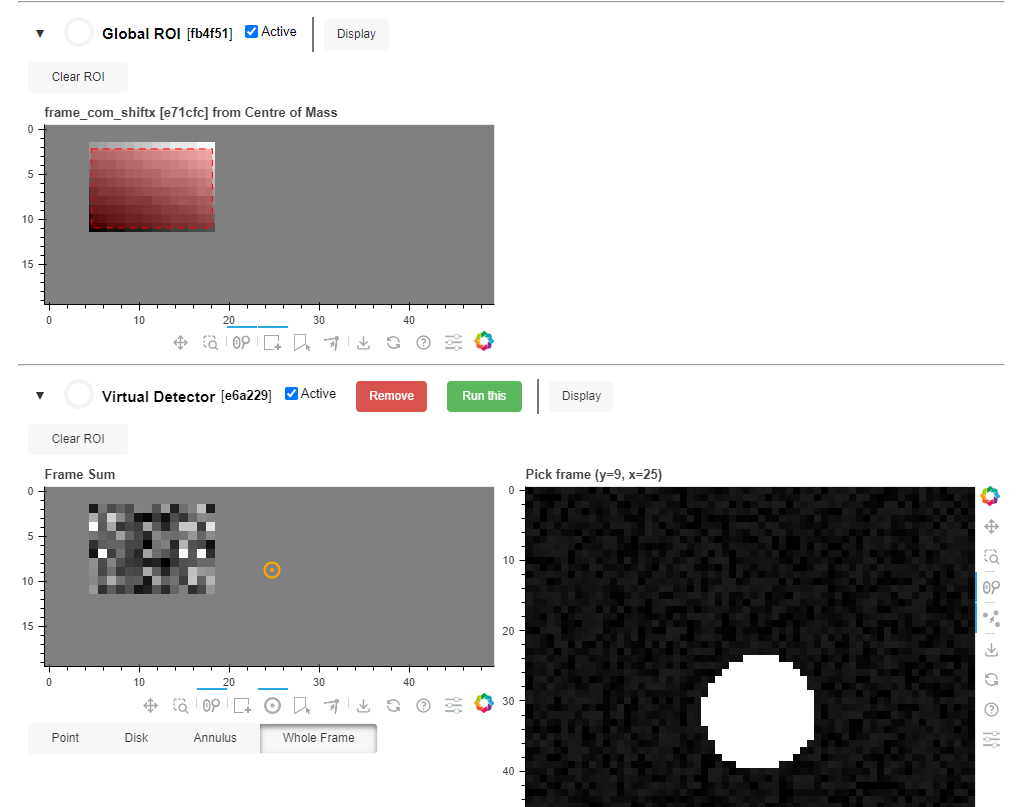

The `Logs` button unfolds a terminal log window, showing diagnostics from runs of the `UIContext`:

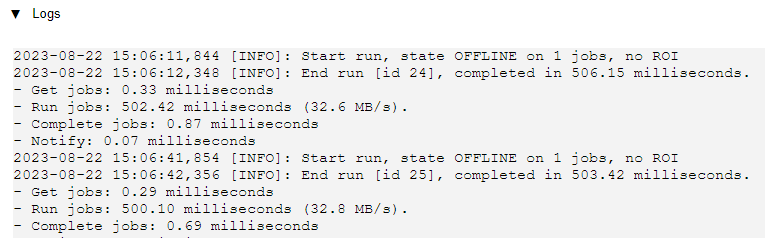

Each window exists between two horizontal dividers:

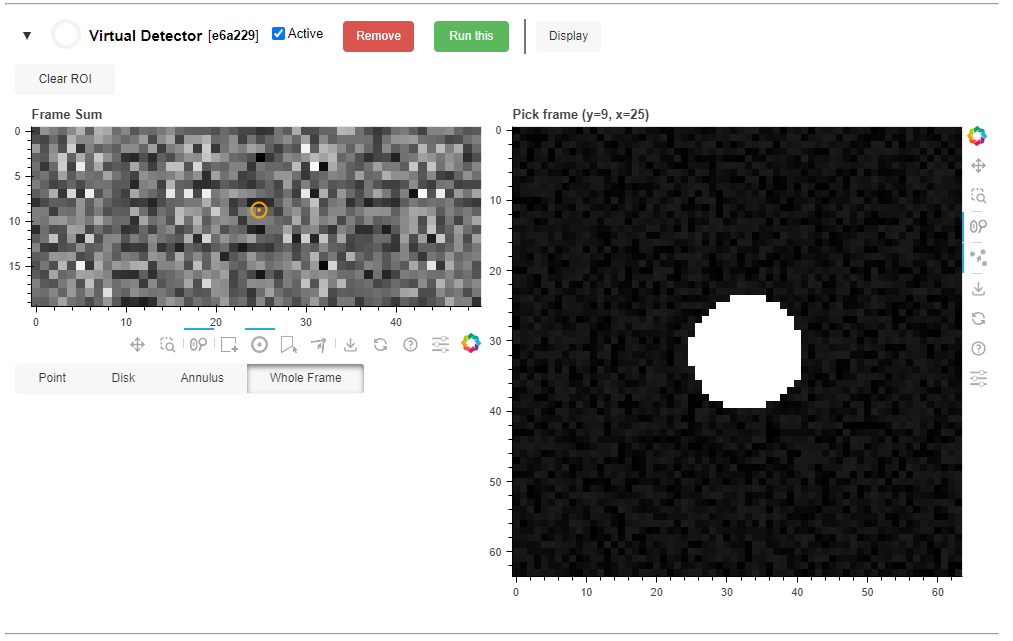

The `Run this` button runs only the analysis currently defined by this window, while the `Remove` button will delete the window from the `UIContext` layout. The window can be hidden / collapsed using using the arrow at the far left of the header. The `Active` checkbox, when ticked, will respond when the UIContext's `Run All` button is pressed (and vice-versa).

At the bottom of the cell / layout we have the `Add window` menu:

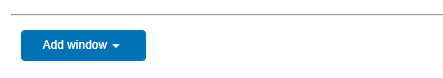

this allows you to add additional windows to the `UIContext` layout.

## Inspect results

Results from runs of the `UIContext` are stored in a `ResultsManager`, which has its own `.layout()` method:

In [9]:
ui_context.results_manager.layout()

Button(description='Reload cell', style=ButtonStyle())

Column
    [0] Row
        [0] Markdown(str)
        [1] Button(align='center', button_type='primary', max_width=100, name='Refresh table')
    [1] Row
        [0] HSpacer()
        [1] Button(align='center', button_type='danger', max_width=100, name='Delete selection')
    [2] Tabulator(buttons={'show_btn': '🔍', ...}, editors={'when_time': None, ...}, hidden_columns=['timestamp', 'params'], min_width=750, selectable='checkbox', sorters=[{'field': 'run_id', ...], titles={'result_id': 'id', ...}, value=Empty DataFrame
Columns: [...)
    [3] Row
        [0] HSpacer()
        [1] Button(align='center', button_type='warning', max_width=100, name='Clear preview')
    [4] Column(min_height=400)

The result manager layout is tabular, and displays results generated by the UIContext in order of age (by default):

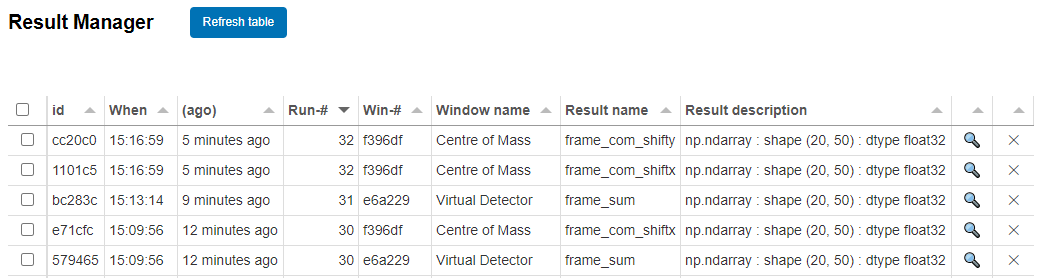

The table does not yet auto-refresh, so use the 'Refresh table' button to bring the results display up to date.

Each result record hasn both a `✕` button, which deletes the row, and a `🔍` button, which displays a preview of that result:

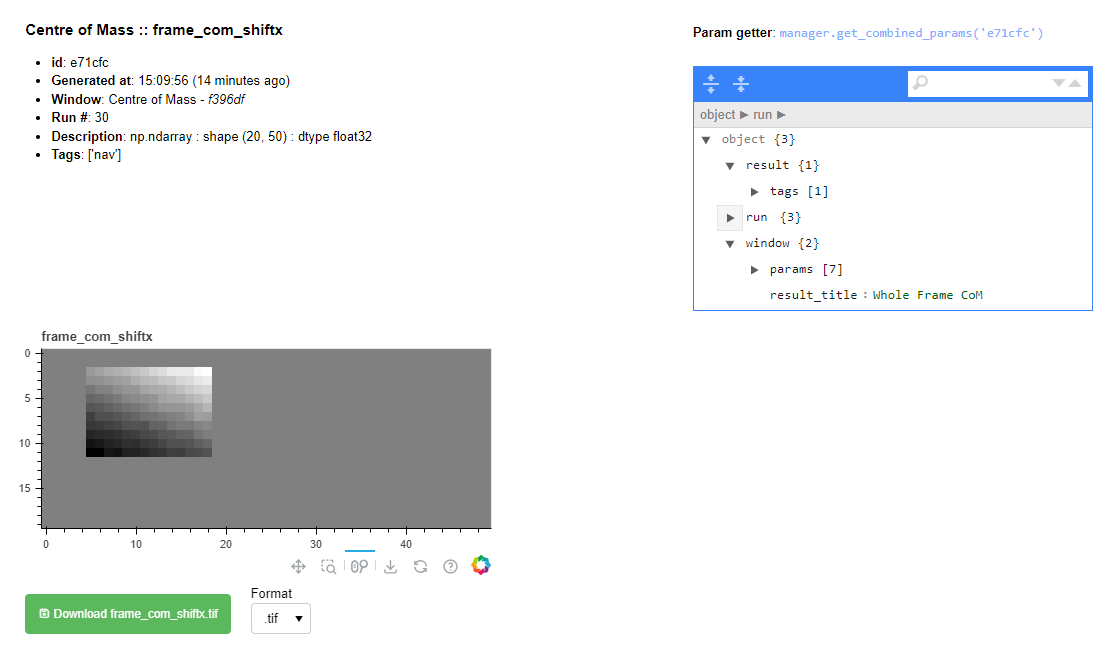

The preview window also displays any metadata for that result record, and can provide tools to save or download results.

Results can be access in Python code by calling the `.get_result_container(res_id)` method on the results_manager.

This returns a `ResultsContainer`, which holds the data itself on the `.data` property, holds any metadata for the result, and can preview itself using `.show()`:

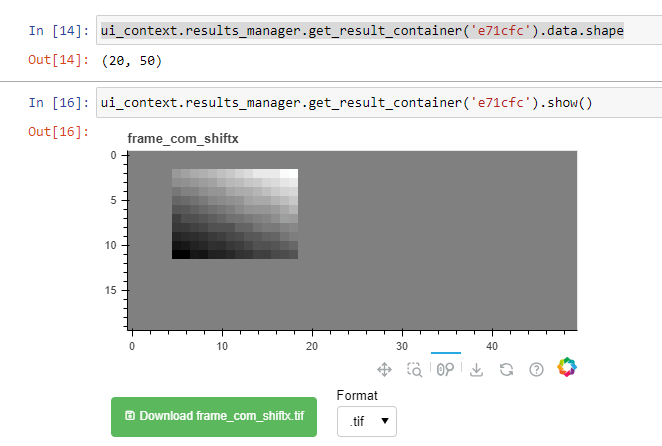